In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
# theoretical data
dice_values = [1, 2, 3, 4, 5, 6]
numbers_counts = {}
for dice1 in dice_values:
    for dice2 in dice_values:
        dice_sum = dice1 + dice2
        if dice_sum in numbers_counts:
            numbers_counts[dice_sum] += 1
        else:
            numbers_counts[dice_sum] = 1

In [4]:
t_df = pd.DataFrame({
    "number": numbers_counts.keys(),
    "count": numbers_counts.values()
})
t_df

,count,number
0,1,2
1,2,3
2,3,4
3,4,5
4,5,6
5,6,7
6,5,8
7,4,9
8,3,10
9,2,11


In [5]:
t_df["prob"] = t_df["count"] / t_df["count"].sum()
t_df

,count,number,prob
0,1,2,0.027778
1,2,3,0.055556
2,3,4,0.083333
3,4,5,0.111111
4,5,6,0.138889
5,6,7,0.166667
6,5,8,0.138889
7,4,9,0.111111
8,3,10,0.083333
9,2,11,0.055556


In [6]:
# experimental data
e_df = pd.read_csv("data.csv")
e_df["count"] = 1.0
e_df = e_df.groupby("number").sum()
e_df["number"] = e_df.index.astype(float)
e_df["prob"] = e_df["count"] / e_df["count"].sum()
e_df

,Unnamed: 0,count,number,prob
number,,,,
2,176,4.0,2.0,0.034188
3,364,8.0,3.0,0.068376
4,704,10.0,4.0,0.085470
5,312,7.0,5.0,0.059829
6,841,19.0,6.0,0.162393
7,1485,20.0,7.0,0.170940
8,855,16.0,8.0,0.136752
9,938,15.0,9.0,0.128205
10,605,9.0,10.0,0.076923


In [7]:
df = pd.merge(t_df, e_df, on="number", how="outer", suffixes=["_theoretical", "_experimental"])
df

,count_theoretical,number,prob_theoretical,Unnamed: 0,count_experimental,prob_experimental
0,1,2,0.027778,176,4.0,0.034188
1,2,3,0.055556,364,8.0,0.068376
2,3,4,0.083333,704,10.0,0.085470
3,4,5,0.111111,312,7.0,0.059829
4,5,6,0.138889,841,19.0,0.162393
5,6,7,0.166667,1485,20.0,0.170940
6,5,8,0.138889,855,16.0,0.136752
7,4,9,0.111111,938,15.0,0.128205
8,3,10,0.083333,605,9.0,0.076923
9,2,11,0.055556,204,6.0,0.051282


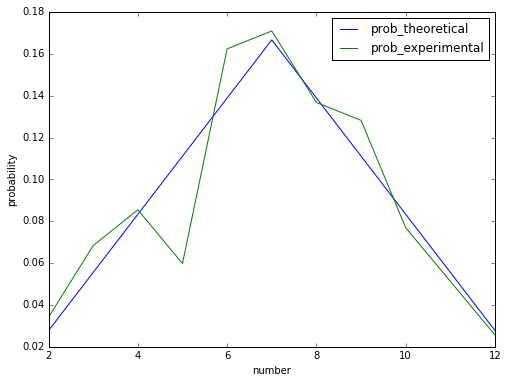

In [8]:
ax = df.plot(x="number", y=["prob_theoretical", "prob_experimental"], figsize=(8,6))
ax.set_ylabel("probability")